Author David Miszczyk 
February 2024
    The motivation for this project was that I wanted to learn how to implement neural networks using TensorFlow to do machine learning. I.e. regression tasks. The task was a time series prediction of daily stock closing price using the Google stock. The Yahoo Finance API was used to obtain historical price data for the Google stock. I experimented with Scikit-learn models to do regression tasks in the past in the Introduction to Data Science class at UIC. The TensorFlow library is quite different and cumbersome to work with at times. I visited the Tensorflow site and looked at the classification example which predicts whether a patient has a heart disease. I modified the code slightly to do a regression task instead. It uses a feedforward neural network or FNN as a regressor. The FNN uses the mean squared error as an accuracy metric which is standard. Elastic Net regularization was added to address overfitting. I.e. L1 and L2 were added in the get_basic_model(). The FNN implements 3 layers, i.e. normalization layer, 2 dense layers, 1 output dense layer. I also wanted to see how a more complex neural network, i.e. recurrent neural network or RNN, performs. The RNN example code is provided in a markdown cell. It has 5 layers, i.e. 4 RNN layers, 1 output layer. It also uses the mean squared error. Both models were ran for 100 epochs because it's a small enough number that it does not take too long to compute. Note, this project could be made into a data science experiment by; 1. formulate a hypothesis such as predicting which model will perform better and why. 2. comparing the accuracy metrics to provide a verdict. Another option to make the project into a statistical experiment could be to state a population parameter, e.g. daily trade volume data, and formulate a null hypothesis, e.g. Daily volume does not affect the price in a meaningful way, and test it. In other words, this was for learning how TensorFlow works mostly.

https://www.tensorflow.org/tutorials/load_data/pandas_dataframe

   The above link shows the documention about the basic use of the Sequential class to do a classification task. Note, the code here is modified compared to the example code in order to do a regression task instead. This code uses the mean squared error loss function as the accuracy metric and wrangles historical stock price data using DataFrames in Pandas.
   The code below takes historical price data from the Yahoo Finance API for Google. It then uses an FNN model to predict closing prices. In addition, it uses Matplotlib to plot the predicted and actual values of closing prices as well as the loss function over the epochs. This process is done for a SimpleRNN model also. There are two different models employed in total, i.e. FNN, SimpleRNN, in order to investigate the difference between outputs of an FNN and SimpleRNN. Note, some potential hypotheses to make the code a data science experiment could include; The FNN will be a worse predictor than a SimpleRNN due to the nature of recurrent networks. I will add a detailed explanation later. This could be verified by comparing the mean squared error of the models.
   Note, I removed the Close column of data in an attempt to avoid overfitting.

In [1]:
import tensorflow as tf
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
import math
from tensorflow.keras import regularizers

# Get stock info for Google
goog = yf.Ticker("GOOG")

start_date = dt.datetime(2023,1,1)

end_date = dt.datetime(2023,12,31)

goog_data = goog.history(start = start_date, end = end_date) # returns DataFrame

# print("Google price\n", goog_data.head(20))

num_feature_names = ['Open', 'High', 'Low', 'Volume']

num_features = goog_data[num_feature_names] # usually denoted X

target = goog_data['Close'] # target variable is the closing price usually denoted y

print("target", len(target), len(num_features))

size = math.ceil(len(num_features) * 0.8) # use an 80% training and 20% testing split

X_train, X_test = num_features.iloc[:size], num_features.iloc[size:]

y_train, y_test = target.iloc[:size], target.iloc[size:]

print(num_features)

# num_features = tf.convert_to_tensor(num_features) # converts to a tensor

normalizer = tf.keras.layers.Normalization(axis = -1)

normalizer.adapt(X_train)
# normalizer.adapt(X_test)

#normalizer(X_train.iloc[:3])


target 250 250
                                 Open        High         Low    Volume
Date                                                                   
2023-01-03 00:00:00-05:00   89.830002   91.550003   89.019997  20738500
2023-01-04 00:00:00-05:00   91.010002   91.239998   87.800003  27046500
2023-01-05 00:00:00-05:00   88.070000   88.209999   86.559998  23136100
2023-01-06 00:00:00-05:00   87.360001   88.470001   85.570000  26612600
2023-01-09 00:00:00-05:00   89.195000   90.830002   88.580002  22996700
...                               ...         ...         ...       ...
2023-12-22 00:00:00-05:00  142.130005  143.250000  142.054993  18494700
2023-12-26 00:00:00-05:00  142.979996  143.945007  142.500000  11170100
2023-12-27 00:00:00-05:00  142.830002  143.320007  141.050995  17288400
2023-12-28 00:00:00-05:00  141.850006  142.270004  140.828003  12192500
2023-12-29 00:00:00-05:00  140.679993  141.434998  139.899994  14872700

[250 rows x 4 columns]



In [2]:
# Use the normalization layer as the first layer of a simple model
# Set up for a regression task by using Mean Squared Error instead.

def get_basic_model():
    model = tf.keras.Sequential([
        normalizer,
        tf.keras.layers.Dense(10, activation = 'relu', kernel_regularizer = regularizers.l1_l2(l1 = 0.01, l2 = 0.01)),
        tf.keras.layers.Dense(10, activation = 'relu', kernel_regularizer = regularizers.l1_l2(l1 = 0.01, l2 = 0.01)),
        tf.keras.layers.Dense(1)
    ])

    model.compile(optimizer = 'adam',
                loss = 'mean_squared_error',
                metrics = ['mean_squared_error'] )

    return model

print("hi")

hi


In [3]:
model = get_basic_model()

SHUFFLE_BUFFER = 500

BATCH_SIZE = 2

# increased epochs improved accuracy in testing
hist = model.fit(X_train, y_train, epochs = 100, batch_size = BATCH_SIZE)


Epoch 1/100


100/100 [==============================] - 1s 2ms/step - loss: 13409.2930 - mean_squared_error: 13408.7275
Epoch 2/100
100/100 [==============================] - 0s 2ms/step - loss: 12927.0664 - mean_squared_error: 12926.4570
Epoch 3/100
100/100 [==============================] - 0s 2ms/step - loss: 11815.8223 - mean_squared_error: 11815.1152
Epoch 4/100
100/100 [==============================] - 0s 2ms/step - loss: 9576.2617 - mean_squared_error: 9575.3652
Epoch 5/100
100/100 [==============================] - 0s 2ms/step - loss: 6226.5610 - mean_squared_error: 6225.3999
Epoch 6/100
100/100 [==============================] - 0s 2ms/step - loss: 3291.9707 - mean_squared_error: 3290.5693
Epoch 7/100
100/100 [==============================] - 0s 3ms/step - loss: 1760.4136 - mean_squared_error: 1758.8625
Epoch 8/100
100/100 [==============================] - 0s 2ms/step - loss: 1252.7067 - mean_squared_error: 1251.0967
Epoch 9/100
100/100 [==============================] - 

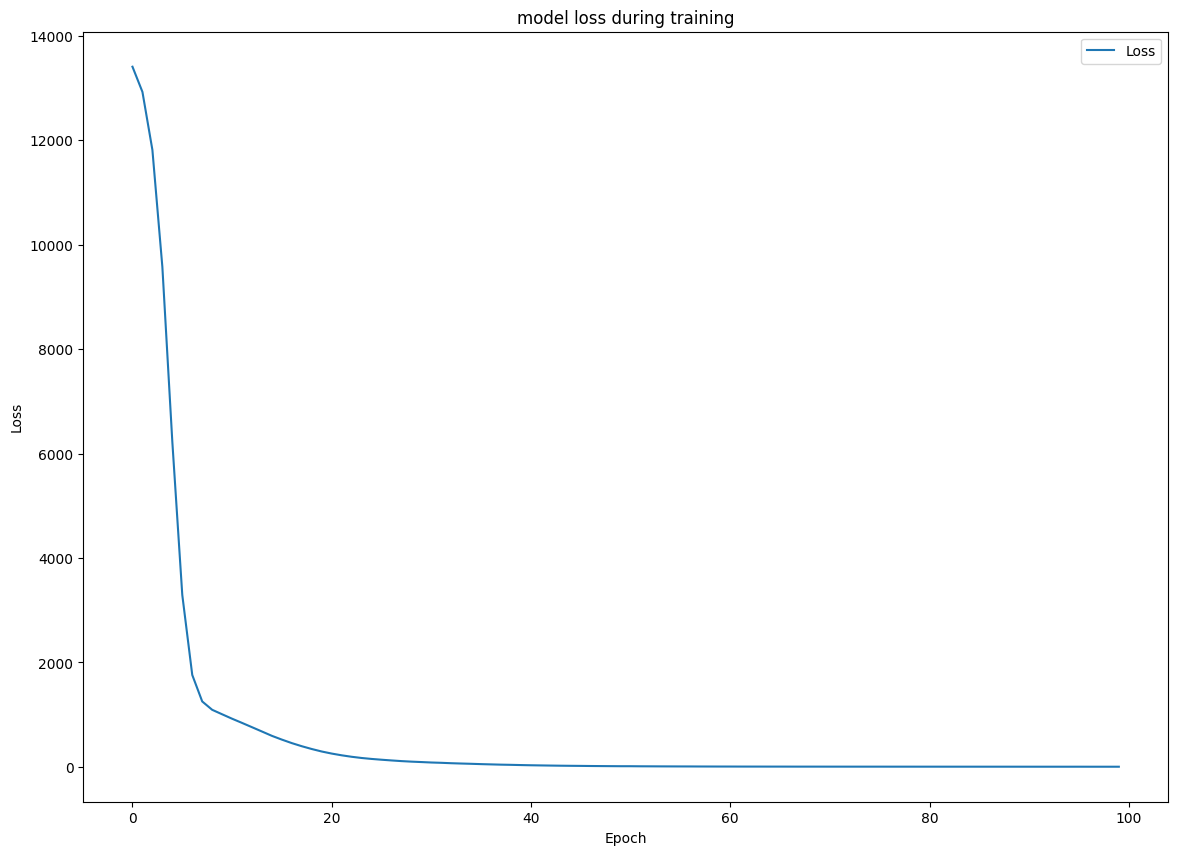

In [4]:
# plot the metric
plt.figure(figsize = (14,10))

plt.plot(hist.history['loss'], label='Loss')

#if 'mean_squared_error' in hist.history: Brilliant CGPT idea here
#    plt.plot(hist.history['mean_squared_error'], label='MSE')

plt.title('model loss during training')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.rc('font', size = 20) # flag

The FNN model uses an 80% training to 20% testing split.

The cell below displays a plot showing the training data, test data, and FNN model predictions for GOOG stock closing prices.

2/2 [==============================] - 0s 4ms/step


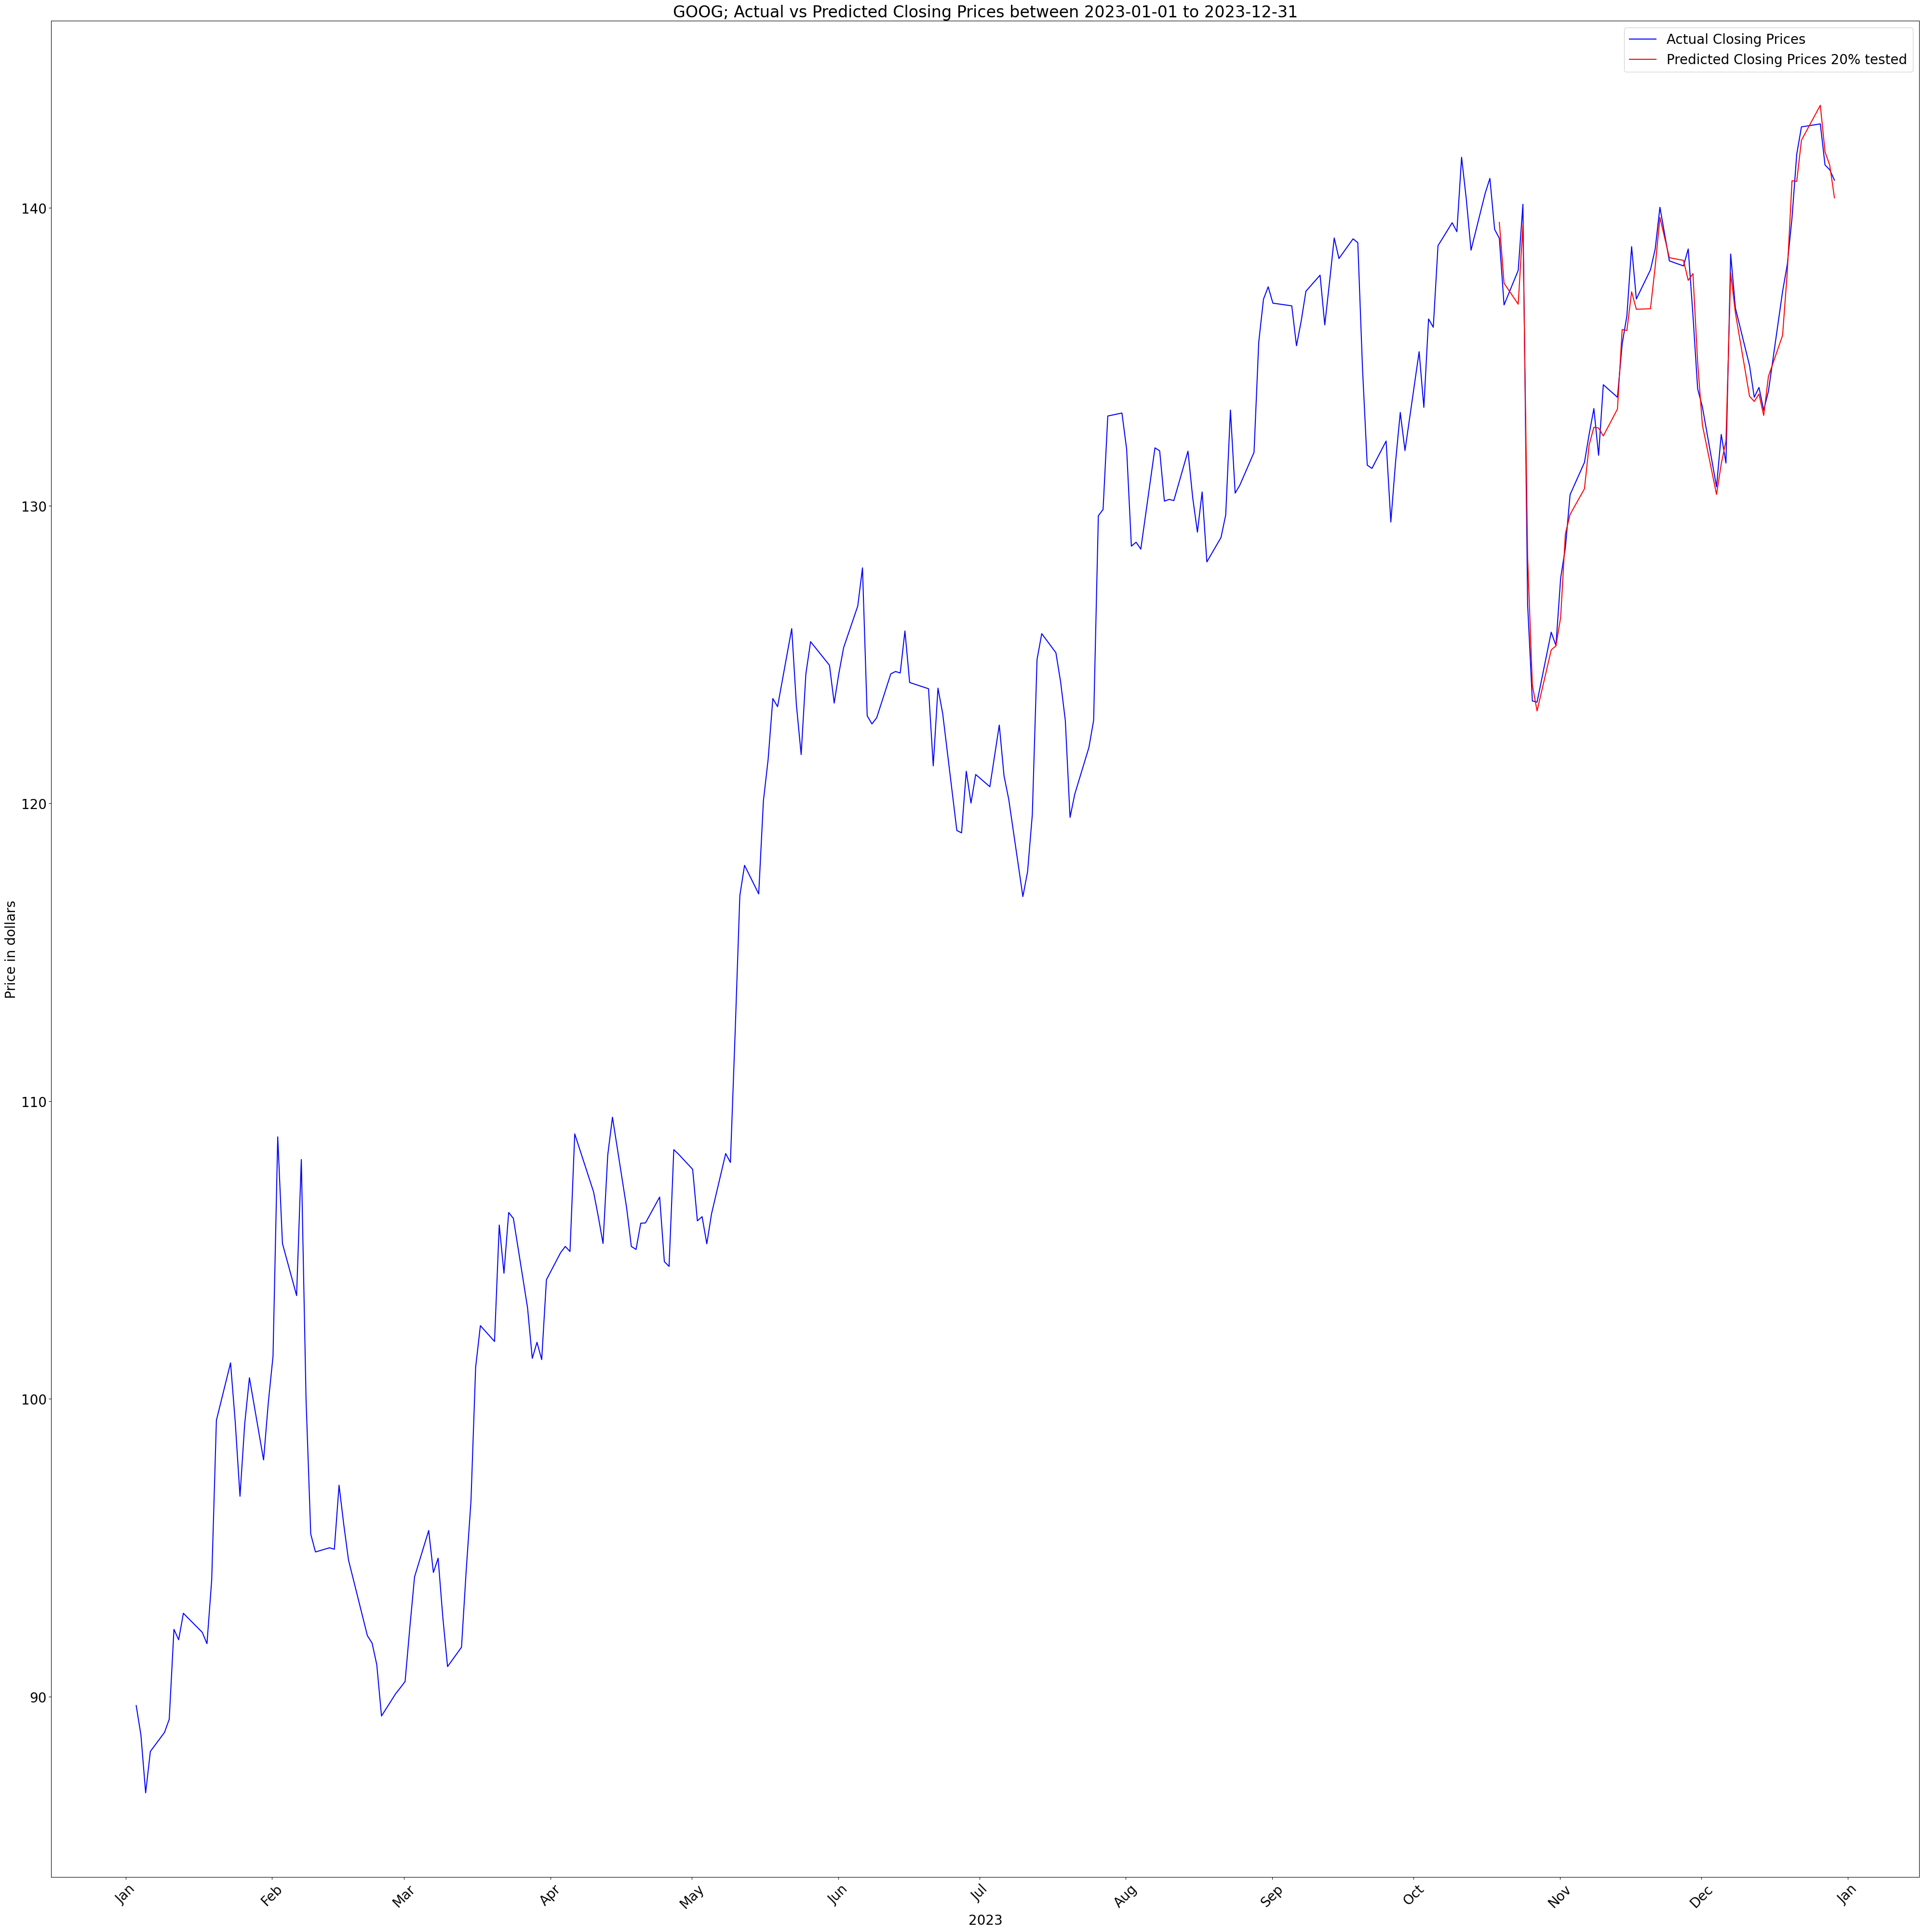

In [5]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import mplfinance as mpf

predictions = model.predict(X_test) # predicted closing prices
predictions = predictions.flatten()

# Correctly align the index for test data by using X_train i.e. first 80% of the data.
test_index = goog_data.index[len(X_train):]

plt.figure(figsize=(50, 50))

# Plot actual closing prices for the entire period
plt.plot(goog_data.index, target, label="Actual Closing Prices", color="blue")

# Plot predicted closing prices for the test period
plt.plot(test_index, predictions, label="Predicted Closing Prices 20% tested", color="red")

plt.title("GOOG; Actual vs Predicted Closing Prices between 2023-01-01 to 2023-12-31")
plt.xlabel("2023")
plt.ylabel("Price in dollars")
plt.legend()

# Formatting the date in the x-axis
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.xticks(rotation=45)

plt.show()

A note on model inference, the market price reverses sharply downward in October where it hits a local minimum and the model somehow predicted that. In December, the model incorrectly predicted the price would continue to climb upward while it actually traded nearly flat. In other words, the model could not predict when a trend would change in some direction.

The cell below shows a candlestick chart of the Google stock price for fiscal 2023.

print(len(test_index), len(predictions))

print(test_index[0].date())

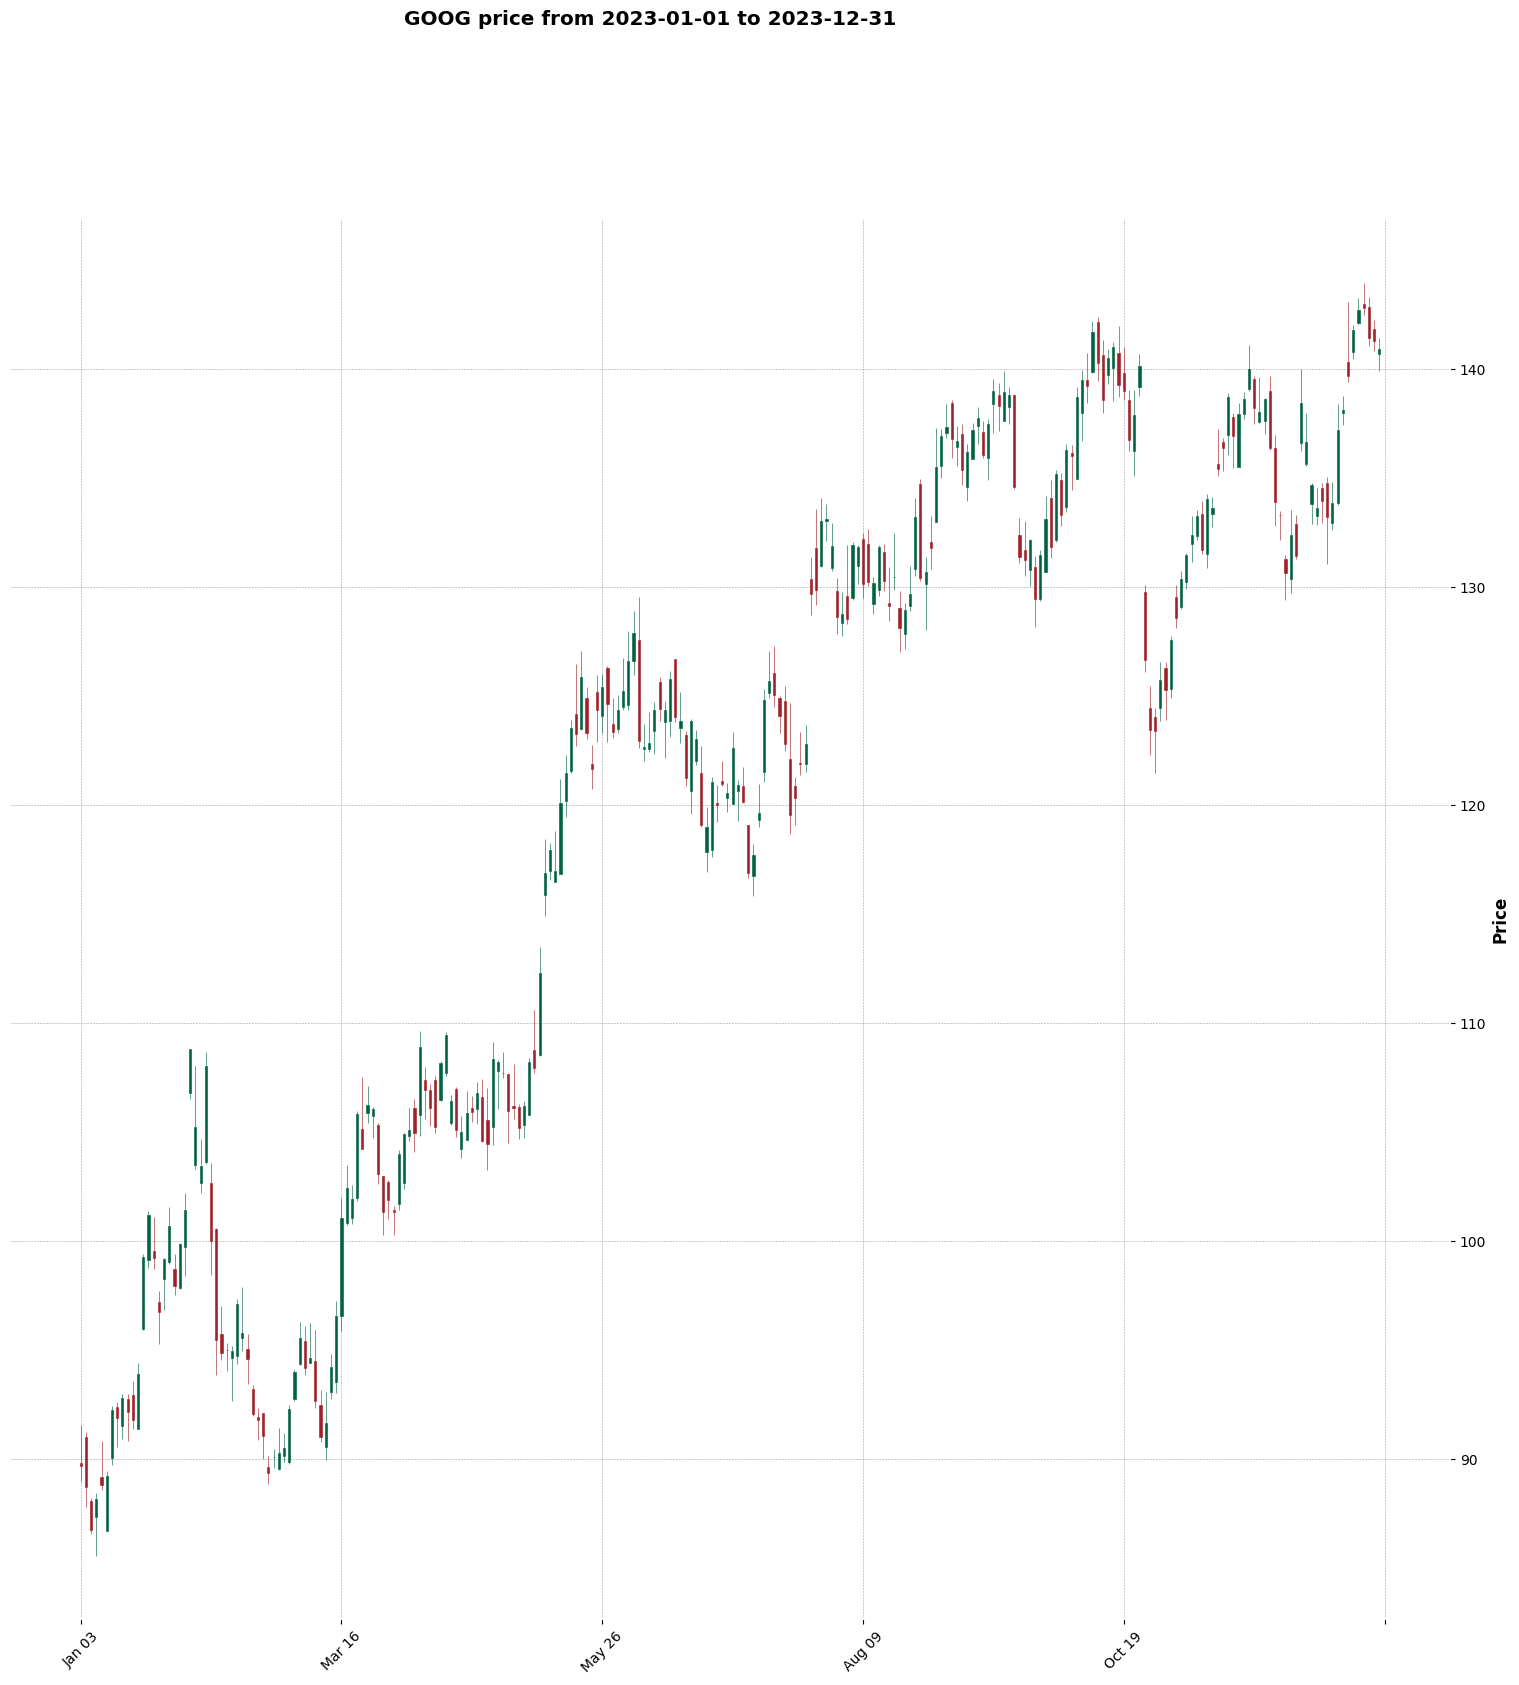

In [6]:
df = pd.DataFrame({'Date': test_index, 'Value':predictions})

df.set_index('Date', inplace=True)

mpf.plot(goog_data, type='candle', figscale = 3, style='charles',title='GOOG price from 2023-01-01 to 2023-12-31', figsize=(20,20))

In [7]:
#print(predictions)

#print(target.tail(10))

The code below takes the training data with an 80% training to 20% testing split and generates a simple RNN to predict prices. The code predicts prices for each day's close. Visualizations included using matplotlib.
Example code for the Simple RNN found here; https://www.geeksforgeeks.org/time-series-forecasting-using-recurrent-neural-networks-rnn-in-tensorflow/

In [8]:
print(goog_data.columns)

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')


In [9]:
# Step 3. Note, the RNN code follows in the steps below.
training_data_len = math.ceil(len(goog_data) * .8)

training_data_len

train_data = goog_data[:training_data_len].iloc[:,3:4] # take the Close column

print(train_data.head(10)) # sanity check

test_data = goog_data[training_data_len:].iloc[:,3:4] # make a copy *fix this piece

                               Close
Date                                
2023-01-03 00:00:00-05:00  89.699997
2023-01-04 00:00:00-05:00  88.709999
2023-01-05 00:00:00-05:00  86.769997
2023-01-06 00:00:00-05:00  88.160004
2023-01-09 00:00:00-05:00  88.800003
2023-01-10 00:00:00-05:00  89.239998
2023-01-11 00:00:00-05:00  92.260002
2023-01-12 00:00:00-05:00  91.910004
2023-01-13 00:00:00-05:00  92.800003
2023-01-17 00:00:00-05:00  92.160004


In [10]:
# print(train_data.shape, test_data.shape)

# print(type(train_data), type(test_data))

In [11]:
# Step 4 reshaping
dataset_train = goog_data['Close'] # makes a numpy array

dataset_train = np.reshape(dataset_train, (-1,1)) # reshapes for each column of 5

dataset_train.shape

(250, 1)

In [12]:
# print(type(dataset_train))

In [13]:
# Step 5
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))

i = np.arange(dataset_train.size)

print(i)

scaled_train = scaler.fit_transform(dataset_train)

print(scaled_train[:5])

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

In [14]:
# Step 6
dataset_test = test_data.Close.values

dataset_test = np.reshape(dataset_test, (-1,1))

scaled_test = scaler.fit_transform(dataset_test)

In [15]:
print(len(scaled_test))

print(*scaled_test[:5])

50
[0.80226517] [0.6869207] [0.74665232] [0.86096749] [0.16838289]


In [16]:
# Step 7
X_train = [] # clears the previous data in memory

y_train = [] # clears the previous data in memory

size = len(scaled_train) # X and y structures are 200 elements

print("size", size)

# sliding indow size 10
for i in range(10, size):
    X_train.append(scaled_train[i - 10:i, 0])
    y_train.append(scaled_train[i, 0])
    if i <= 11:
        print(X_train)
        print(y_train)
        print()

print(len(X_train))

print(len(y_train))

size 250
[array([0.05227475, 0.03461199, 0.        , 0.02479941, 0.03621777,
       0.04406781, 0.09794834, 0.09170394, 0.10758261, 0.09616425])]
[0.08938449922392522]

[array([0.05227475, 0.03461199, 0.        , 0.02479941, 0.03621777,
       0.04406781, 0.09794834, 0.09170394, 0.10758261, 0.09616425]), array([0.03461199, 0.        , 0.02479941, 0.03621777, 0.04406781,
       0.09794834, 0.09170394, 0.10758261, 0.09616425, 0.0893845 ])]
[0.08938449922392522, 0.12738636321872998]

240
240


In [17]:
# Step 7 testing set
# Does a window size 0 affect performance of the RNN?
X_test = []

y_test = []

n = len(scaled_test) # 50 elements for both X and y structures

print("n", n)

# padding = np.zeros((10,))

for i in range(10, n):
    X_test.append(scaled_test[i - 10: i, 0])

    y_test.append(scaled_test[i, 0])

# both should not be empty
print(X_test[:5])

print(y_test[:5])

print(len(X_test))

print(len(y_test))

n 50
[array([0.80226517, 0.6869207 , 0.74665232, 0.86096749, 0.16838289,
       0.00205978, 0.        , 0.12100915, 0.09783733, 0.21472693]), array([0.6869207 , 0.74665232, 0.86096749, 0.16838289, 0.00205978,
       0.        , 0.12100915, 0.09783733, 0.21472693, 0.26673526]), array([0.74665232, 0.86096749, 0.16838289, 0.00205978, 0.        ,
       0.12100915, 0.09783733, 0.21472693, 0.26673526, 0.3589079 ]), array([0.86096749, 0.16838289, 0.00205978, 0.        , 0.12100915,
       0.09783733, 0.21472693, 0.26673526, 0.3589079 , 0.41452075]), array([0.16838289, 0.00205978, 0.        , 0.12100915, 0.09783733,
       0.21472693, 0.26673526, 0.3589079 , 0.41452075, 0.46343922])]
[0.2667352604816733, 0.35890790474967016, 0.41452075277194034, 0.46343922159770123, 0.5077234828529216]
40
40


In [18]:
# Step 8
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))

y_train = np.reshape(y_train, (y_train.shape[0],1))

print("X_train :", X_train.shape, "y_train :", y_train.shape) # debug

X_train : (240, 10, 1) y_train : (240, 1)


In [19]:
# Step 8 For testing set
X_test, y_test = np.array(X_test), np.array(y_test)

# Reshaping
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))

y_test = np.reshape(y_test, (y_test.shape[0],1))

print("X_test :", X_test.shape, "y_test :", y_test.shape)

X_test : (40, 10, 1) y_test : (40, 1)


In [20]:
# Step 9
from keras.models import Sequential
from keras.layers import SimpleRNN
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import SGD

regressor = Sequential()

regressor.add(SimpleRNN(units = 50,
                        activation = "tanh",
                        return_sequences = True,
                        input_shape = (X_train.shape[1],1)))

regressor.add(Dropout(0.2))

regressor.add(SimpleRNN(units = 50,
                        activation = "tanh",
                        return_sequences = True))

regressor.add(SimpleRNN(units = 50,
                        activation = "tanh",
                        return_sequences = True))

regressor.add(SimpleRNN(units = 50))

regressor.add(Dense(units = 1, activation='sigmoid'))

regressor.compile(optimizer = tf.keras.optimizers.legacy.SGD(learning_rate = 0.01,
                                  decay=1e-6,
                                  momentum=0.9,
                                  nesterov=True),
                  loss = "mean_squared_error")

hist2 = regressor.fit(X_train, y_train, epochs = 100, batch_size = 2)

regressor.summary()

Epoch 1/100
120/120 [==============================] - 3s 7ms/step - loss: 0.0194
Epoch 2/100
120/120 [==============================] - 1s 7ms/step - loss: 0.0119
Epoch 3/100
120/120 [==============================] - 1s 7ms/step - loss: 0.0085
Epoch 4/100
120/120 [==============================] - 1s 7ms/step - loss: 0.0096
Epoch 5/100
120/120 [==============================] - 1s 7ms/step - loss: 0.0077
Epoch 6/100
120/120 [==============================] - 1s 7ms/step - loss: 0.0074
Epoch 7/100
120/120 [==============================] - 1s 7ms/step - loss: 0.0070
Epoch 8/100
120/120 [==============================] - 1s 7ms/step - loss: 0.0065
Epoch 9/100
120/120 [==============================] - 1s 7ms/step - loss: 0.0063
Epoch 10/100
120/120 [==============================] - 1s 7ms/step - loss: 0.0067
Epoch 11/100
120/120 [==============================] - 1s 7ms/step - loss: 0.0058
Epoch 12/100
120/120 [==============================] - 1s 7ms/step - loss: 0.0052
Epoch 13/100


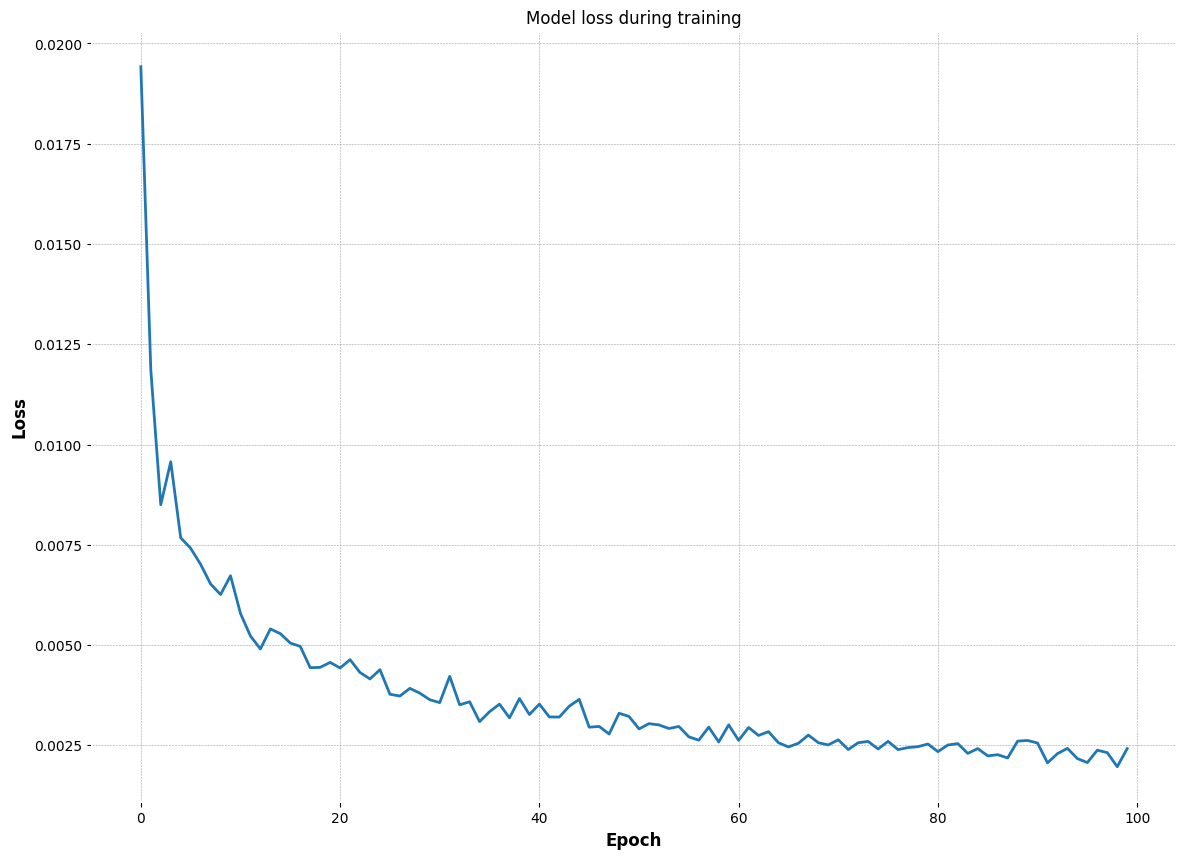

In [21]:
# plot the loss function
plt.figure(figsize = (14,10))

plt.plot(hist2.history['loss'])

plt.title('Model loss during training')

plt.xlabel('Epoch')

plt.ylabel('Loss')

plt.show()

In [22]:
# Step 10
y_RNN = regressor.predict(X_test)

2/2 [==============================] - 1s 7ms/step


In [23]:
# print(X_test.shape) # the following are for debugging

# print(y_RNN.shape)

# print(y_RNN)

In [24]:
# Step 11
y_RNN_0 = scaler.inverse_transform(y_RNN) # use the above variable

In [25]:
#print(y_RNN_0)

#print(len(test_data))

#print(test_data.index)

The cell below displays a plot showing the training data, test data, and Simple RNN model predictions for GOOG stock closing prices.

size 50
size 40
size 200


Text(0.5, 0, '2023')

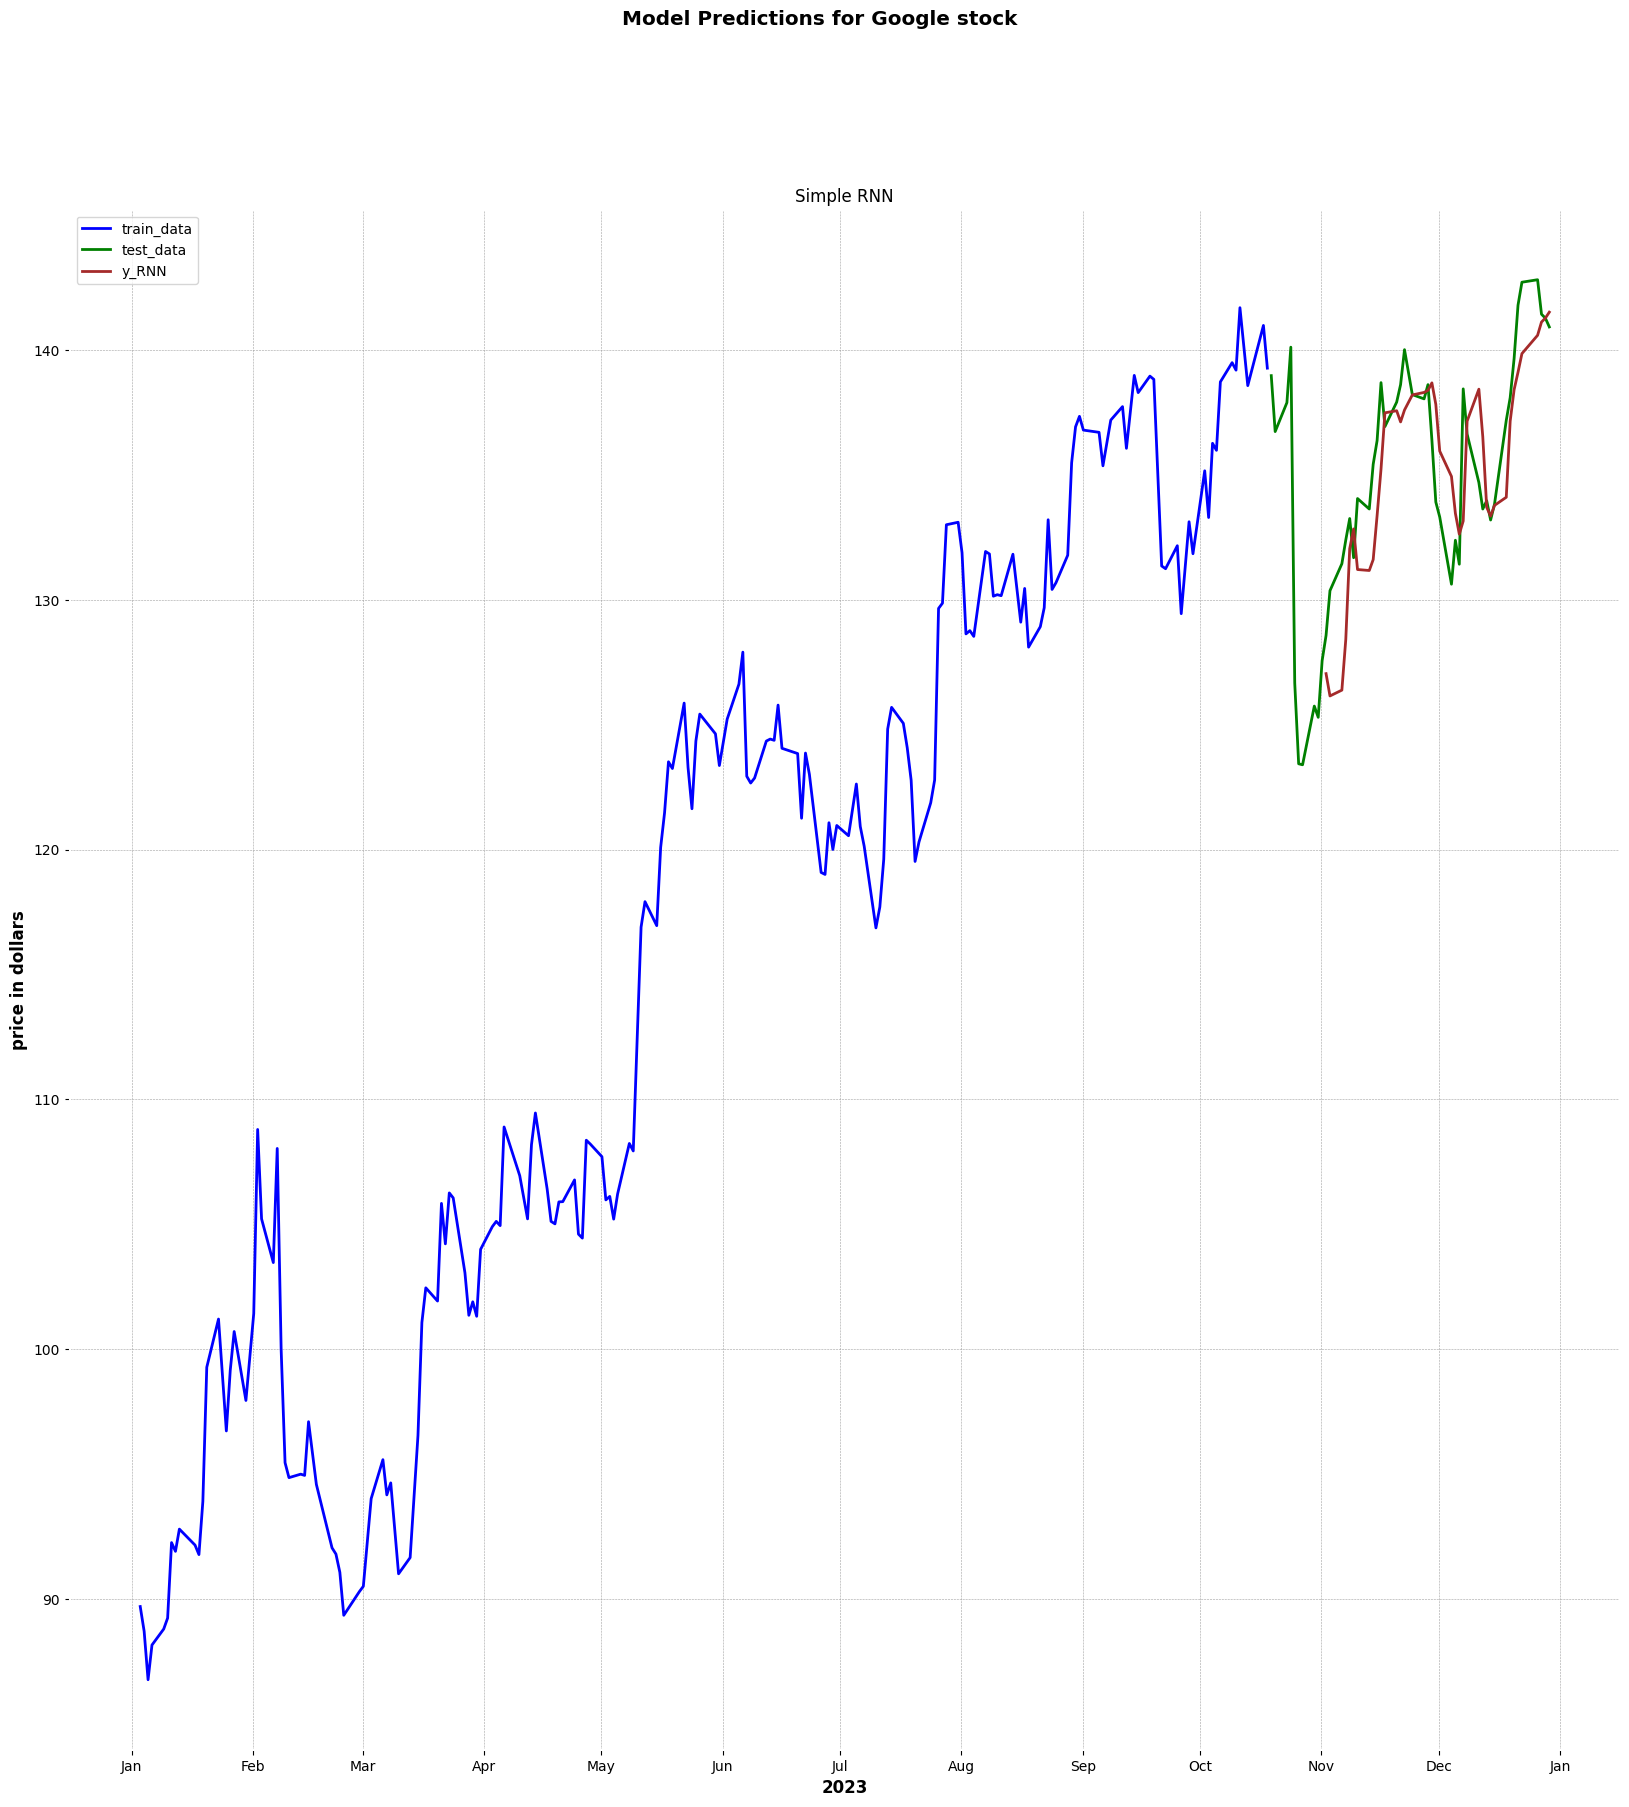

In [26]:
# Step 12 RNN plot below this line
fig, axs = plt.subplots(1, figsize=(20,20),sharex=True,sharey=True)

fig.suptitle('Model Predictions for Google stock')

print("size", len(test_data)) 

print("size", len(y_RNN_0))

print("size", len(train_data.index))

#Plot for RNN predictions
axs.plot(train_data.index, train_data.Close, label="train_data", color="b")

axs.plot(test_data.index, test_data.Close, label = "test_data", color="g")

axs.plot(test_data.index[10:], y_RNN_0, label = "y_RNN", color = "brown")

axs.legend()

axs.title.set_text("Simple RNN")

axs.xaxis.set_major_locator(mdates.MonthLocator())

axs.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

axs.set_ylabel("price in dollars")

axs.set_xlabel("2023")

# print(y_RNN_0, num_features.Close) 

# what indexed elements of num_features hold the actual values? Then iterate to compare y_RNN_0 to actual values.

A model inference note, the RNN usually predicted slightly lower prices when the Google stock was sharply trading upward in October. And, the model predicted slightly higher prices when the Google stock traded sharply downward in November and December. In other words, the model was unable to capture fluctuations in trading price.

This cell could include a performance comparison between the FNN and RNN implemenations. Both were ran for 100 epochs for consistency.